## ML - Naive Bayes classifier for Census Income 


Considering the Census Income data with response variable as **Income(>50k and <=50k)**.

Import the csv dataset from https://www.kaggle.com/uciml/adult-census-income


1. Identify the presence of missing values, fill the missing values with mean for numerical attributes and mode value for categorical attributes. 
2. Extract X as all columns except the Income column and Y as Income column. 
3. Split the data into training set and testing set. 
4. Model the classifier using GaussianNB, BernoulliNB and MultinomialNB 
5. Compute the accuracy and confusion matrix for each models. 
6. Plot the decision boundary, visualize training and test results of all the models 
7. Create an output .csv file consisting actual Test set values of Y (column name: Actual) and Predictions of Y(column name: Predicted). 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
sns.set()

# Plotly libraries
import plotly
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import os
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from kmodes.kmodes import KModes
#from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

###### Reading the dataset

In [ ]:
salary_data = pd.read_csv('adult.csv')
salary_data.head()

###### Extracting the Columns present in the dataset

In [4]:
salary_data.columns = salary_data.columns.str.title()
salary_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education.Num',
       'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital.Gain', 'Capital.Loss', 'Hours.Per.Week', 'Native.Country',
       'Income'],
      dtype='object')

###### Descriptive Statistics on the given dataset

In [ ]:
salary_data[['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education.Num',
       'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital.Gain', 'Capital.Loss', 'Hours.Per.Week', 'Native.Country',
       'Income']].describe().transpose()

###### Data type of the columns present

In [ ]:
salary_data.info()

###### Unique values of the column "Native.Country"

In [7]:
salary_data['Native.Country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

###### Replacing the Undefined values(?) with NaN

In [ ]:
salary_data.replace({'Workclass': {'?': np.nan}}, regex=False,inplace=True)
salary_data.replace({'Occupation': {'?': np.nan}}, regex=False,inplace=True)
salary_data.replace({'Native.Country': {'?': np.nan}}, regex=False,inplace=True)
salary_data.head()

###### Filling the NaN values of column "Age" and "Fnlwgt" with mean

In [9]:
salary_data['Age'].fillna(salary_data['Age'].mean(), inplace=True)
salary_data['Fnlwgt'].fillna(salary_data['Fnlwgt'].mean(), inplace=True)

###### Filling the NaN values of "Workclass", "Occupation" and "Native.Country" with the mode

In [10]:
salary_data['Workclass'].fillna(salary_data['Workclass'].mode()[0], inplace=True)
salary_data['Occupation'].fillna(salary_data['Occupation'].mode()[0], inplace=True)
salary_data['Native.Country'].fillna(salary_data['Native.Country'].mode()[0], inplace=True)

###### Checking for any Null values for all columns

In [ ]:
salary_data.isna().sum()

###### Converting the integer data types into floating point variables

In [12]:
salary_data_float = salary_data.select_dtypes(include = [np.number])
salary_data_float.columns

Index(['Age', 'Fnlwgt', 'Education.Num', 'Capital.Gain', 'Capital.Loss',
       'Hours.Per.Week'],
      dtype='object')

###### Showing the box plots of all the features present

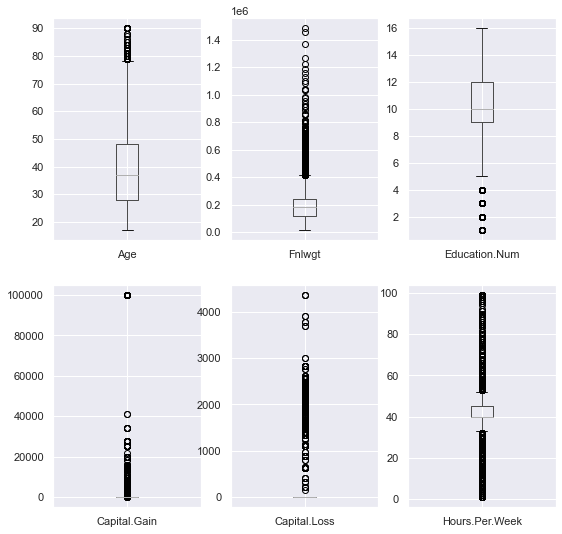

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (9, 9))

salary_data.boxplot(column = "Age", ax = axes[0, 0]);
salary_data.boxplot(column = "Fnlwgt", ax = axes[0, 1]);
salary_data.boxplot(column = "Education.Num", ax = axes[0, 2]);
salary_data.boxplot(column = "Capital.Gain", ax = axes[1, 0]);
salary_data.boxplot(column = "Capital.Loss", ax = axes[1, 1]);
salary_data.boxplot(column = "Hours.Per.Week", ax = axes[1, 2]);

###### Calculating the Z-Score of the floating point columns

In [14]:
z_score = np.abs(stats.zscore(salary_data_float))
salary_data = salary_data[(z_score < 3).all(axis = 1)]

In [ ]:
salary_data.reset_index(inplace = True)
salary_data.drop("index", axis = 1, inplace = True)
salary_data.head()

###### Converting all the object type columns in their lower case as part of Data Preprocessing

In [ ]:
for column in salary_data.columns:
    if salary_data[column].dtype == "object":
        salary_data[column] = salary_data[column].str.lower()
        
salary_data.head()

###### Descriptive Statistics of the floating point Columns

In [ ]:
salary_data.describe()

In [18]:
salary_data.select_dtypes(exclude = [np.number]).columns

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income'],
      dtype='object')

###### Checking to see the count of the Column "Workclass"

In [ ]:
colors = ["purple", "blue", "green", "orange", "yellow", "red"]
salary_data["Workclass"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the count of the Column "Education"

In [ ]:
colors = ["purple", "blue", "green", "orange", "pink", "red"]
salary_data["Education"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the count of the Column "Marital.Status"

In [ ]:
colors = ["purple", "blue", "green", "orange", "pink", "red"]
salary_data["Marital.Status"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the values of Column "Occupation"

In [ ]:
colors = ["purple", "blue", "green", "orange", "pink", "red"]
salary_data["Occupation"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the values of column "Race"

In [ ]:
colors = ["red", "green", "blue", "orange", "yellow", "purple"]
salary_data["Race"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the values of Column "Sex"

In [ ]:
colors = ["cyan", "pink"]
salary_data["Sex"].value_counts().plot.bar(color = colors, legend = True)
plt.legend()

###### Checking to see the values of Column Relationship

In [ ]:
colors = ["pink", "green", "blue", "orange", "yellow", "purple"]
salary_data["Relationship"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

###### Checking to see the target variable distribution

In [ ]:
colors = ["pink", "green"]
salary_data["Income"].value_counts().plot.bar(color = colors, legend = True);
plt.legend();

###### We see that <=50k has a greter distribution than >50k households

###### Calculating the percentages of the "Income"

In [27]:
salary_data["Income"].value_counts() * 100 / len(salary_data)

<=50k    77.692101
>50k     22.307899
Name: Income, dtype: float64

##### Calculate the mean of years for each profession and count

In [ ]:
mean_age = salary_data.groupby("Workclass")["Age"].agg(["count", "mean"])
mean_age

###### Percentages of the Mean Ages across differnt Workclass

In [29]:
mean_age["count"] * 100 / mean_age["count"].sum()

Workclass
federal-gov          2.967011
local-gov            6.420142
never-worked         0.023468
private             75.898485
self-emp-inc         3.144696
self-emp-not-inc     7.419203
state-gov            4.080059
without-pay          0.046936
Name: count, dtype: float64

###### Mean Age Distribution of Workclass

In [ ]:
colors = ["pink", "green", "blue", "orange", "yellow", "purple"]
mean_age["mean"].plot.bar(color = colors);

As we can see from our data, the average age for private is 36 years. At the same time, the average age for those who have never worked is 20-21, which is not surprising - since students usually start working from the age of 22. We can also see that 14 people (0.04%) do not receive a salary.

###### Eduction and Sex Group by Feature

In [ ]:
education_sex = salary_data.groupby(["Education", "Sex"])["Sex"].count()
education_sex

###### Percentage Distribution of Education and Sex

In [ ]:
education_sex * 100 / education_sex.sum()

###### Plotting the Distribution Education and Sex feature in a horizontal bar graph

In [ ]:
plt.figure(figsize=(20, 15))
education_sex.plot.barh(color = colors)
plt.title("Count")

###### Education-Sex group by with Age

In [ ]:
salary_data.groupby(["Education", "Sex"])["Age"].mean()

###### Plotting the Distribution of Education-Sex with Age Group by

In [ ]:
plt.figure(figsize=(20, 15))
salary_data.groupby(["Education", "Sex"])["Age"].mean().plot.barh(color = colors)
plt.title("Mean age")

###### Let's see how the profitability is interrelated depending on the:

1.Sex

2.Race

3.Relationship

###### We will use next statistical methods:

1.Chisquare test

2.Fisher's exact test

3.Conjugacy coefficients (Phi, Association, Pearson, Cramer, Chuprov)

In [36]:
def contingency2x2_coefficients(data, return_coefficients = False):
    
    if isinstance(data, pd.core.frame.DataFrame):
        data = data.to_numpy()
        
    K_a = (data[0, 0] * data[1, 1] - data[0, 1] * data[1, 0]) / (data[0, 0] * data[1, 1] + data[0, 1] * data[1, 0])
    K_k = (data[0, 0] * data[1, 1] - data[0, 1] * data[1, 0]) / ((data[0, 0] + data[0, 1]) * (data[0, 1] + data[1, 1]) * (data[0, 0] + data[1, 0]) * (data[1, 0] + data[1, 1])) ** (0.5)
    
    print("The coefficient of association: ", K_a)
    print("The coefficient of contingency: ", K_k)
    
    if (K_a >= 0.5) or (K_k >= 0.3):
        print("The relationship is quite strong between the two features")
    else:
        print("The relationship is weak between the two features")
        
    if return_coefficients:
        return (K_a, K_k)

In [37]:
def plot_chi2_test(data, yets_correction = True, return_statistics = False, only_coefficients = False, fisher_test = True):
    
    if isinstance(data, pd.core.frame.DataFrame):
        data = data.to_numpy()
    
    chi2, p, dof, ex = stats.chi2_contingency(data, correction = yets_correction)
    margins_sum = stats.contingency.margins(data)
    summed = margins_sum[0].sum()
    
    if not only_coefficients:
        chi2_critical = stats.chi2.ppf(0.95, df = (data.shape[0] - 1) * (data.shape[1] - 1))
        
        chi2_arange = np.arange(0, chi2_critical + 2, 0.01)
        chi2_vals = stats.chi2.pdf(chi2_arange, df = (data.shape[0] - 1) * (data.shape[1] - 1))
        
        plt.plot(chi2_arange, chi2_vals, label = "Chisquare distribution", color = "k")
        plt.axvline(chi2, color = "b", label = "Chisquare-statistical")
        plt.axvline(chi2_critical, color = "r", label = "Chisquare-critical", linestyle = "dashed")
        plt.ylim(0, chi2_vals[1:].max())
        
        plt.fill_between(np.arange(chi2, chi2_critical + 2, 0.01), stats.chi2.pdf(np.arange(chi2, chi2_critical + 2, 0.01), df = (data.shape[0] - 1) * (data.shape[1] - 1)), color = "dodgerblue")
        
        if p <= 0.05:
            print("The features are interrelated. P-value: {}".format(p))
        else:
            print("The features are not interrelated. P-value: {}".format(p))
            
        if ((data.shape[0] == 2) and (data.shape[1] == 2)) and fisher_test:
            oddsratio, p_fisher = stats.fisher_exact(data)
            
            print("Fisher's test p-value: ", p_fisher)
            
        print("Chisquare statistics: ", chi2)
        print("Chisquare critical ", chi2_critical)
        print("-"*10)
    
    Pirson_coefficient = (chi2  / (chi2 + summed)) ** (0.5)
    Chuprov_coefficient = (chi2 / (summed * ((data.shape[0] - 1) * (data.shape[1] - 1)) ** (0.5)))
    
    if (data.shape[0] == 2) and (data.shape[1] == 2):
        phi_coefficient = (chi2 / summed) ** (0.5)
        print("Phi coefficient: ", phi_coefficient)
    else:
        Cramer_coefficient = ((chi2 / summed) / (np.min([data.shape[0] - 1, data.shape[1] - 1]))) ** (0.5)
        print("Cramer's coefficient: ", Cramer_coefficient)
    

    
    print("Pearson's coefficient: ", Pirson_coefficient)
    print("Chuprov's coefficient: ", Chuprov_coefficient)

In [38]:
sex_income = pd.crosstab(index = salary_data["Sex"], columns = salary_data["Income"])
sex_income

Income,<=50k,>50k
Sex,,
female,9091,1022
male,14083,5632


In [39]:
contingency2x2_coefficients(sex_income)

The coefficient of association:  0.5611497618858793
The coefficient of contingency:  0.209922128616096
The relationship is quite strong between the two features


We can see the strong relationship between Sex and Income

The features are interrelated. P-value: 8.22896194288344e-288
Fisher's test p-value:  6.69574e-318
Chisquare statistics:  1314.4394268671558
Chisquare critical  3.841458820694124
----------
Phi coefficient:  0.209922128616096
Pearson's coefficient:  0.20544424233891723
Chuprov's coefficient:  0.04406730008271275


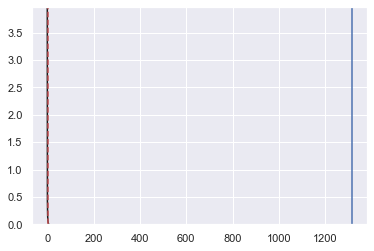

In [40]:
plot_chi2_test(sex_income, yets_correction = False)

The relationship between gender and salary is very high. 
Let's look at the race column:

In [41]:
race_income = pd.crosstab(index = salary_data["Race"], columns = salary_data["Income"])
race_income

Income,<=50k,>50k
Race,,
amer-indian-eskimo,263,32
asian-pac-islander,712,230
black,2555,316
other,225,22
white,19419,6054


The features are interrelated. P-value: 3.1775138046990016e-62
Chisquare statistics:  293.1973472457482
Chisquare critical  9.487729036781154
----------
Cramer's coefficient:  0.099144345723368
Pearson's coefficient:  0.09866063414132854
Chuprov's coefficient:  0.0049148006444573586


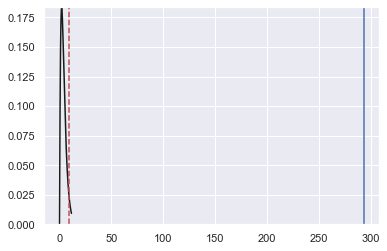

In [42]:
plot_chi2_test(race_income)

In [43]:
relationship_income = pd.crosstab(index = salary_data["Relationship"], columns = salary_data["Income"])
relationship_income

Income,<=50k,>50k
Relationship,,
husband,6739,5022
not-in-family,6925,711
other-relative,883,30
own-child,4768,58
unmarried,3090,181
wife,769,652


The features are interrelated. P-value: 0.0
Chisquare statistics:  5983.957656123724
Chisquare critical  11.070497693516351
----------
Cramer's coefficient:  0.4479011614780545
Pearson's coefficient:  0.4087711385680971
Chuprov's coefficient:  0.0897179569101043


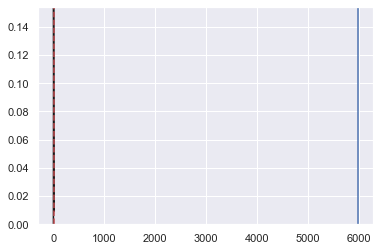

In [44]:
plot_chi2_test(relationship_income)

And here we can observe a strong relationship. It turns out that the profitability of a person depends on his gender, race and relationship.

Let's see if the profitability depends on the age. To do this, we will use the Student's t-criterion.
We also use Label Encoder for the Income Column

In [45]:
labels = {"<=50k": 0, ">50k": 1}
decode_labels = {0: "<=50k", 1: ">50k"}

salary_data.replace(labels, inplace=True)

In [46]:
income_greater50 = salary_data["Age"][salary_data["Income"] ==  0]
income_lesseq50 = salary_data["Age"][salary_data["Income"] == 1]

In [47]:
len(income_greater50), len(income_lesseq50)

(23174, 6654)

###### We can apply the Student's criterion if:

The values being compared do not constitute a pair of correlating values
The distribution of features in each sample corresponds to the normal distribution
The variances of the feature in the samples are approximately equal

In [48]:
statistics, p_value = stats.levene(income_greater50, income_lesseq50)

if p_value < 0.05:
    print("The variances are not equal. P-value: {}".format(p_value))
else:
    print("The variances are equal. P-value: {}".format(p_value))

The variances are not equal. P-value: 1.2101724570979645e-132


In [49]:
def plot_histogram_and_qq(data, column_name = "Hisogram", distribution_type="norm", normal_tests = True):
    
    mu = np.mean(data)
    sigma = np.std(data)
    
    # Plot histogram of the 1000 points
    plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    count, bins, ignored = plt.hist(data, 30, density=True)
    ax.set_title(column_name)
    ax.set_xlabel('Values')
    ax.set_ylabel('Freq')

    # Overlay the bell curve (normal distribution) on the bins data
    bell_curve = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
    plt.plot(bins, bell_curve, linewidth=2, color='r')

    # Q-Q plot
    plt.subplot(1,2,2)
    res = stats.probplot(data, dist=distribution_type, plot=plt)
    # (osm, osr) = res[0]
    # (slope, intercept, r) = res[1]
    # For details see: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html
    # print("slope, intercept, r:", slope, intercept, r)
    # print("r is the square root of the coefficient of determination")

    plt.show()
    
    print("-"*50)
    print("Min/Max: ", [np.min(data), np.max(data)])
    print("The three sigma rule: ", [mu - 3 * sigma, mu + 3 * sigma])
    print("Mean/Mode/Median: ", [np.mean(data), stats.mode(data), np.median(data)])
    print("Skewness/Kurtosis: ", [stats.skew(data), stats.kurtosis(data)])
    
    if normal_tests and distribution_type == "norm":
        print("-"*50)
        
        statistics, p = stats.normaltest(data)
        
        if p < 0.05:
            print("D'Agostino test: the sample is not taken from a normal distribution! P-value: {}".format(p))
        else:
            print("D'Agostino test: the sample is taken from a normal distribution. P-value: {}".format(p))
            
        if data.shape[0] > 2000:
            statistics, p = stats.jarque_bera(data)
            
            if p < 0.05:
                print("Jarque-Bera test: the sample is not taken from a normal distribution! P-value: {}".format(p))
            else:
                print("Jarque-Bera test: the sample is taken from a normal distribution. P-value: {}".format(p))
        else:
            statistics, p = stats.shapiro(data)
            
            if p < 0.05:
                 print("Shapiro test: the sample is not taken from a normal distribution! P-value: {}".format(p))
            else:
                print("Shapiro test: the sample is taken from a normal distribution. P-value: {}".format(p))

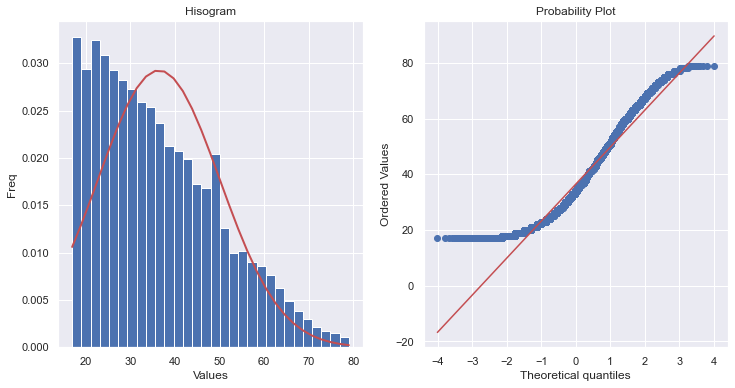

--------------------------------------------------
Min/Max:  [17, 79]
The three sigma rule:  [-4.476598818175219, 77.33756369260345]
Mean/Mode/Median:  [36.43048243721412, ModeResult(mode=array([23], dtype=int64), count=array([825])), 34.0]
Skewness/Kurtosis:  [0.686558744968736, -0.2684932398933011]
--------------------------------------------------
D'Agostino test: the sample is not taken from a normal distribution! P-value: 0.0
Jarque-Bera test: the sample is not taken from a normal distribution! P-value: 0.0


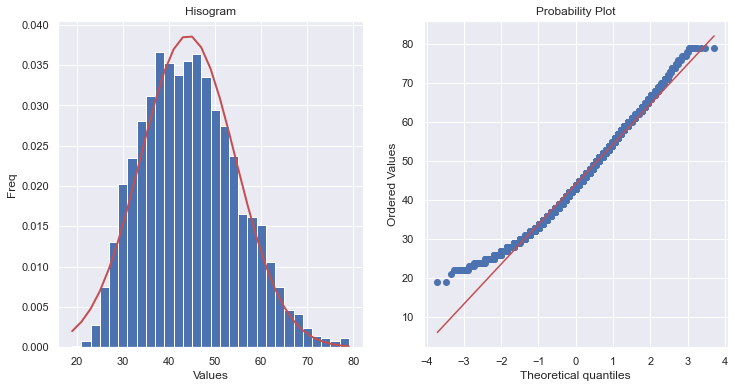

--------------------------------------------------
Min/Max:  [19, 79]
The three sigma rule:  [13.163989745365676, 75.05723057323968]
Mean/Mode/Median:  [44.110610159302674, ModeResult(mode=array([47], dtype=int64), count=array([249])), 44.0]
Skewness/Kurtosis:  [0.37593426232435756, -0.23013931969906398]
--------------------------------------------------
D'Agostino test: the sample is not taken from a normal distribution! P-value: 1.0831897221527115e-36
Jarque-Bera test: the sample is not taken from a normal distribution! P-value: 0.0


In [50]:
plot_histogram_and_qq(income_greater50)
plot_histogram_and_qq(income_lesseq50)

The variances are not equal and the samples are not taken from a normal distribution. We can't use the Student's criterion. We can try to use a nonparametric analog for one-factor analysis of variance - the Kruskell Wallis H-test:

In [51]:
stats.kruskal(income_greater50, income_lesseq50)

KruskalResult(statistic=2217.6615682639413, pvalue=0.0)

The criterion tells us that the median ages for each of the groups are not equal, so we can conclude that the profitability depends on the age.

### Feature Engineering

In [52]:
categorical_cols = salary_data.select_dtypes(exclude = [np.number]).columns
print(categorical_cols)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')


###### Using One hot Encoder for Transoformation of Categorical Variables

In [ ]:
onehotencoder = OneHotEncoder()
encoding_data = pd.DataFrame(onehotencoder.fit_transform(salary_data[categorical_cols]).toarray(), 
                             columns = onehotencoder.get_feature_names(categorical_cols))
encoding_data

In [54]:
salary_data_float = salary_data.select_dtypes(include = [np.number])

###### Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

In [55]:
from sklearn.feature_selection import RFECV

In [56]:
X = salary_data_float.iloc[:, :-1].copy()
y = salary_data_float["Income"].copy()

scaler = StandardScaler()
x = scaler.fit_transform(X)

min_features = 3
estimator = LogisticRegression()
rfecv = RFECV(estimator = estimator, step = 1, cv = 5,
             scoring = "roc_auc", min_features_to_select = min_features)

rfecv.fit(x, y)
print("Optimal number of features: ", rfecv.n_features_)
print("Number of all features: ", x.shape[1])

Optimal number of features:  6
Number of all features:  6


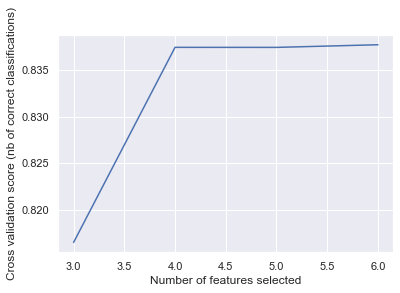

In [57]:
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features,
               len(rfecv.grid_scores_) + min_features),
         rfecv.grid_scores_);

In [58]:
for i in range(X.shape[1]):
    print(f'Column: {i}, Selected {rfecv.support_[i]}, Rank: {rfecv.ranking_[i]}')

Column: 0, Selected True, Rank: 1
Column: 1, Selected True, Rank: 1
Column: 2, Selected True, Rank: 1
Column: 3, Selected True, Rank: 1
Column: 4, Selected True, Rank: 1
Column: 5, Selected True, Rank: 1


In [59]:
salary_data_float.iloc[:, :-1].columns

Index(['Age', 'Fnlwgt', 'Education.Num', 'Capital.Gain', 'Capital.Loss',
       'Hours.Per.Week'],
      dtype='object')

In [60]:
X = salary_data_float.iloc[:, :-1].copy()
X = pd.concat([encoding_data, X], axis = 1)

In [ ]:
print(X.shape)
X.head()

In [62]:
# X = scaler.fit_transform(X)
y = salary_data["Income"].copy()

In [63]:
list(y.unique())

[0, 1]

### Training and selection best mode

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [65]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

### Building a Pipeline to fit our model along with K-Fold cross validation of 10 folds

#### GridSearchCV lets us combine an estimator with a grid search preamble to tune hyper-parameters. The method picks the optimal parameter from the grid search and uses it with the estimator selected by the user. GridSearchCV inherits the methods from the classifier, so we can use the score, predict, etc., methods directly through the GridSearchCV interface. This technique is used to find the optimal parameters to use with an algorithm. 

### MultinomialNB

In [ ]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('scaler', MinMaxScaler()),   #   MinMaxScaler StandardScaler
                 ('classifier' , MultinomialNB())])

# Create param grid.
param_grid = [
    {'classifier' : [MultinomialNB()],
     'classifier__alpha' : np.logspace(-4, 3, 10)   
    }
]

print(f"# Tuning hyper-parameters ")
mnb_clf = GridSearchCV(pipe, param_grid = param_grid, cv=10, verbose=1, refit=True, n_jobs=-1, scoring='accuracy')
mnb_clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(mnb_clf.best_params_)
print(mnb_clf.best_score_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, mnb_clf.predict(X_test)
print(classification_report(y_true, y_pred))  # target_names=[0,1]
print()


print(f'Accuracy of MultinomialNB classifier on test set: {accuracy_score(y_true, y_pred)}')
print()

###### Plotting of the Confusion Matrix

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mnb_clf, X_test, y_test,
                                 display_labels=[decode_labels[0], decode_labels[1]],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### BernoulliNB

In [ ]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('scaler', StandardScaler()),   #   MinMaxScaler
                 ('classifier' , BernoulliNB())])

# Create param grid.
param_grid = [
    {'classifier' : [BernoulliNB()],
     'classifier__alpha' : np.logspace(-4, 3, 10)
    }
]

print(f"# Tuning hyper-parameters ")
bnb_clf = GridSearchCV(pipe, param_grid = param_grid, cv=10, refit=True, verbose=1, n_jobs=-1, scoring='accuracy')
bnb_clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(bnb_clf.best_params_)
print(bnb_clf.best_score_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, bnb_clf.predict(X_test)
print(classification_report(y_true, y_pred))  # target_names=[0,1]
print()


print(f'Accuracy of BernoulliNB classifier on test set: {accuracy_score(y_true, y_pred)}')
print()

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(bnb_clf, X_test, y_test,
                                 display_labels=[decode_labels[0], decode_labels[1]],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### GaussianNB

In [ ]:
# Create first pipeline for base without reducing features.
pipe = Pipeline([('scaler', MinMaxScaler()),   #     StandardScaler
                 ('classifier' , GaussianNB())])

# Create param grid.
param_grid = [
    {'classifier' : [GaussianNB()],
    }
]

print(f"# Tuning hyper-parameters ")
gnb_clf = GridSearchCV(pipe, param_grid = param_grid, cv=10, verbose=1, n_jobs=-1, scoring='accuracy')
gnb_clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(gnb_clf.best_params_)
print(gnb_clf.best_score_)
print()

print("Detailed classification report:")
print()
y_true, y_pred = y_test, gnb_clf.predict(X_test)
print(classification_report(y_true, y_pred))  # target_names=[0,1]
print()


print(f'Accuracy of GaussianNB classifier on test set: {accuracy_score(y_true, y_pred)}')
print()

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gnb_clf, X_test, y_test,
                                 display_labels=[decode_labels[0], decode_labels[1]],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Predicting Test set against all 3 NB models

In [72]:
y_true, mnb_pred, bnb_pred, gnb_pred = y_test, mnb_clf.predict(X_test), bnb_clf.predict(X_test), gnb_clf.predict(X_test)

In [73]:
out_data = pd.DataFrame(
    {'Actual': y_true, 
     'Predicted_MultinomialNB ': mnb_pred, 
     'Predicted_BernoulliNB ': bnb_pred, 
     'Predicted_GaussianNB ': gnb_pred
    }).reset_index(drop=True)

In [74]:
out_data.to_csv('output.csv')

Accuracy of Multinomial Naive Bayes Classifier : 81.9


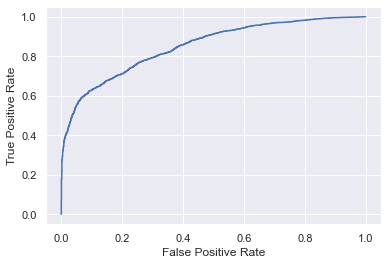

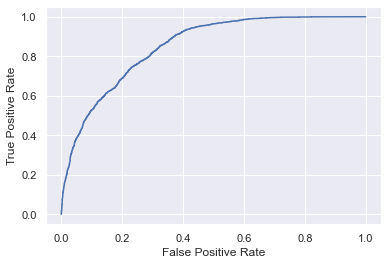

In [75]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay


predictions = mnb_clf.predict(X_test)
probas = mnb_clf.predict_proba(X_test)
print(f"Accuracy of Multinomial Naive Bayes Classifier : {round(accuracy_score(y_test, predictions)*100, 2)}")

for i in range(2):
    y_test_bin = np.int32(y_test == i)
    y_score = probas[:,i]
    fpr, tpr, _ = roc_curve(y_test_bin, y_score, pos_label=1)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [81]:
X_train.shape

(20879, 102)

In [76]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

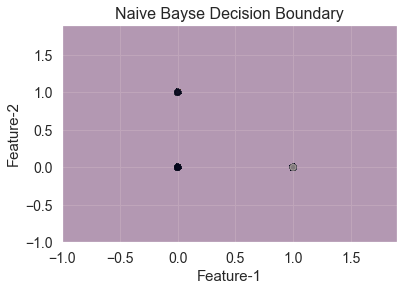

In [80]:
plt.figure()
plt.title("Naive Bayse Decision Boundary", fontsize=16)
plot_decision_boundaries(X_train, y_train, MultinomialNB)
plt.show()